## Spring 2023 schedule data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
calender = pd.read_csv('./datasets/spring_2023/calendar.txt')
trips = pd.read_csv('./datasets/spring_2023/trips.txt')
routes = pd.read_csv('./datasets/spring_2023/routes.txt') 

In [3]:
calender['start_date'] = pd.to_datetime(calender['start_date'], format='%Y%m%d') 
calender['end_date'] = pd.to_datetime(calender['end_date'], format='%Y%m%d') 
calender.head() 

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,BUS223-hbb23017-Su-02,0,0,0,0,0,0,1,2023-06-18,2023-06-25
1,BUS223-hbc23017-Su-02,0,0,0,0,0,0,1,2023-06-18,2023-06-25
2,BUS223-hbg23017-Su-02,0,0,0,0,0,0,1,2023-06-18,2023-06-25
3,BUS223-hbl23017-Su-02,0,0,0,0,0,0,1,2023-06-18,2023-06-25
4,BUS223-hbq23017-Su-02,0,0,0,0,0,0,1,2023-06-18,2023-06-25


In [4]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,route_fare_class,line_id,listed_route,network_id
0,Red,1,NaN,Red Line,Rapid Transit,1,https://www.mbta.com/schedules/Red,DA291C,FFFFFF,10010,Rapid Transit,line-Red,NaN,rapid_transit
1,Mattapan,1,NaN,Mattapan Trolley,Rapid Transit,0,https://www.mbta.com/schedules/Mattapan,DA291C,FFFFFF,10011,Rapid Transit,line-Mattapan,NaN,m_rapid_transit
2,Orange,1,NaN,Orange Line,Rapid Transit,1,https://www.mbta.com/schedules/Orange,ED8B00,FFFFFF,10020,Rapid Transit,line-Orange,NaN,rapid_transit
3,Green-B,1,B,Green Line B,Rapid Transit,0,https://www.mbta.com/schedules/Green-B,00843D,FFFFFF,10032,Rapid Transit,line-Green,NaN,rapid_transit
4,Green-C,1,C,Green Line C,Rapid Transit,0,https://www.mbta.com/schedules/Green-C,00843D,FFFFFF,10033,Rapid Transit,line-Green,NaN,rapid_transit


In [5]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed
0,1,BUS223-hbc23017-Su-02,55839631,Harvard,NaN,0,C01-1,010111,1,NaN,1-_-0,1
1,1,BUS223-hbc23017-Su-02,55839633,Harvard,NaN,0,C01-1,010111,1,NaN,1-_-0,1
2,1,BUS223-hbc23017-Su-02,55839635,Harvard,NaN,0,C01-1,010111,1,NaN,1-_-0,1
3,1,BUS223-hbc23017-Su-02,55839637,Harvard,NaN,0,C01-2,010111,1,NaN,1-_-0,1
4,1,BUS223-hbc23017-Su-02,55839638,Harvard,NaN,0,C01-4,010111,1,NaN,1-_-0,1


In [6]:
trips_cal_merge = pd.merge(trips, calender, on='service_id')
trips_cal_merge = trips_cal_merge[['trip_id', 'route_id', 'service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'start_date', 'end_date']]
trips_cal_merge.head() 

,trip_id,route_id,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,55839631,1,BUS223-hbc23017-Su-02,0,0,0,0,0,0,1,2023-06-18,2023-06-25
1,55839633,1,BUS223-hbc23017-Su-02,0,0,0,0,0,0,1,2023-06-18,2023-06-25
2,55839635,1,BUS223-hbc23017-Su-02,0,0,0,0,0,0,1,2023-06-18,2023-06-25
3,55839637,1,BUS223-hbc23017-Su-02,0,0,0,0,0,0,1,2023-06-18,2023-06-25
4,55839638,1,BUS223-hbc23017-Su-02,0,0,0,0,0,0,1,2023-06-18,2023-06-25


In [7]:
final_merge = pd.merge(trips_cal_merge, routes, on='route_id')
final_merge = final_merge[['trip_id', 'route_id', 'route_desc', 'route_type', 'service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'start_date', 'end_date']]
final_merge = final_merge[final_merge['route_desc']=='Commuter Rail']


### Total number of active days of MBTA during Spring 2023

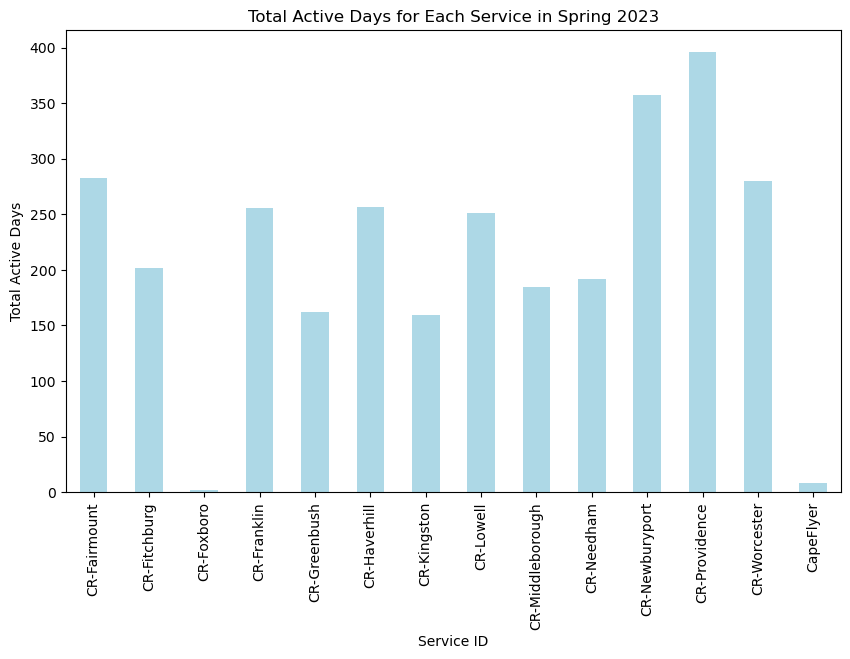

In [8]:
final_merge['total_active_days'] = final_merge[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum(axis=1)

active_days = final_merge.groupby('route_id')['total_active_days'].sum()

plt.figure(figsize=(10, 6))
active_days.plot(kind='bar', color='lightblue')
plt.title(f'Total Active Days for Each Service in Spring 2023')
plt.xlabel('Service ID')
plt.ylabel('Total Active Days')
plt.show()

### Weekday vs Weekend activity during Spring 2023

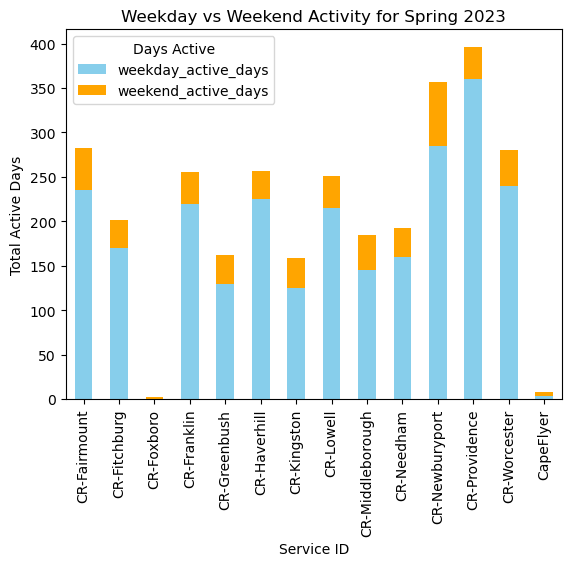

In [9]:
final_merge['weekday_active_days'] = final_merge[['monday', 'tuesday', 'wednesday', 'thursday', 'friday']].sum(axis=1)
final_merge['weekend_active_days'] = final_merge[['saturday', 'sunday']].sum(axis=1)

weekday_vs_weekend = final_merge.groupby('route_id')[['weekday_active_days', 'weekend_active_days']].sum()

weekday_vs_weekend.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title(f'Weekday vs Weekend Activity for Spring 2023')
plt.xlabel('Service ID')
plt.ylabel('Total Active Days')
plt.legend(title='Days Active')
plt.show()

### Frequency Analysis for Spring 2023

In [10]:
avg_active_days_spring = final_merge['total_active_days'].mean()

print(f'Average number of active days per service per week in Spring 2023: {avg_active_days_spring:.2f}')

Average number of active days per service per week in Spring 2023: 2.94


### Peak Usage Days for Spring 2023

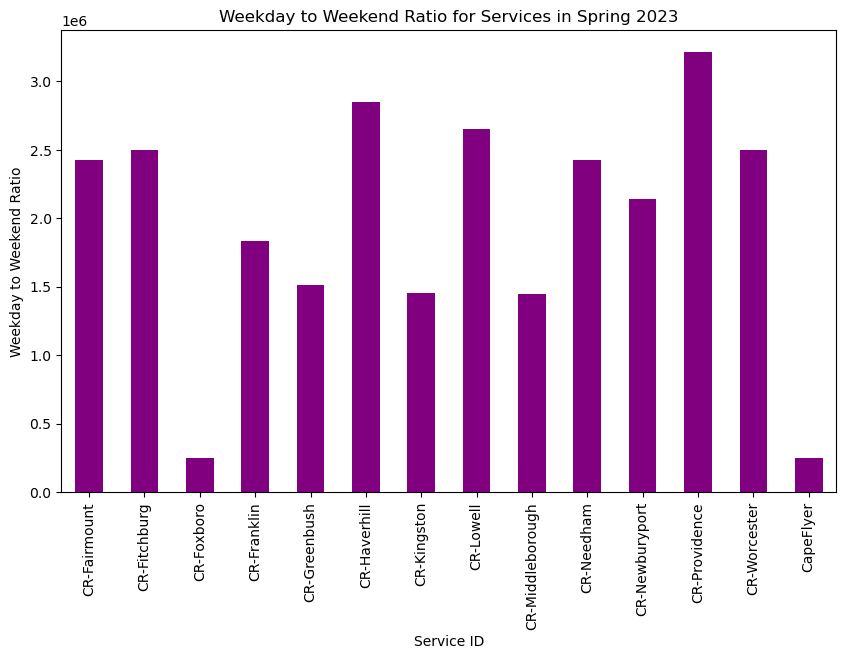

In [21]:
final_merge['weekday_to_weekend_ratio'] = final_merge['weekday_active_days'] / (final_merge['weekend_active_days'] + 1e-6)

weekday_weekend_ratio = final_merge.groupby('route_id')['weekday_to_weekend_ratio'].mean()

plt.figure(figsize=(10, 6))
weekday_weekend_ratio.plot(kind='bar', color='purple')
plt.title(f'Weekday to Weekend Ratio for Services in Spring 2023')
plt.xlabel('Service ID')
plt.ylabel('Weekday to Weekend Ratio')
plt.show()

### How long are services active for during Spring 2023

In [13]:
final_merge['start_date'] = pd.to_datetime(final_merge['start_date'])
final_merge['end_date'] = pd.to_datetime(final_merge['end_date'])

final_merge['active_period_days'] = (final_merge['end_date'] - final_merge['start_date']).dt.days

active_period_stats_spring = final_merge.groupby('route_id')[['route_id', 'active_period_days', 'route_desc']]
print(active_period_stats_spring.head())


           route_id  active_period_days     route_desc
43144  CR-Fairmount                  17  Commuter Rail
43145  CR-Fairmount                  17  Commuter Rail
43146  CR-Fairmount                  16  Commuter Rail
43147  CR-Fairmount                  16  Commuter Rail
43148  CR-Fairmount                  16  Commuter Rail
...             ...                 ...            ...
44152     CapeFlyer                  17  Commuter Rail
44153     CapeFlyer                  17  Commuter Rail
44154     CapeFlyer                   7  Commuter Rail
44155     CapeFlyer                   7  Commuter Rail
44156     CapeFlyer                   7  Commuter Rail

[70 rows x 3 columns]


## Summer 2023 schedule data

In [15]:
calender = pd.read_csv('./datasets/summer_2023/calendar.txt')
trips = pd.read_csv('./datasets/summer_2023/trips.txt')
routes = pd.read_csv('./datasets/summer_2023/routes.txt')

In [16]:
calender['start_date'] = pd.to_datetime(calender['start_date'], format='%Y%m%d')
calender['end_date'] = pd.to_datetime(calender['end_date'], format='%Y%m%d')

In [17]:
trips_cal_merge = pd.merge(trips, calender, on='service_id')
trips_cal_merge = trips_cal_merge[['trip_id', 'route_id', 'service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'start_date', 'end_date']]
final_merge = pd.merge(trips_cal_merge, routes, on='route_id')
final_merge = final_merge[['trip_id', 'route_id', 'route_desc', 'route_type', 'service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'start_date', 'end_date']]
final_merge = final_merge[final_merge['route_desc']=='Commuter Rail']

### Total number of active days of MBTA during Summer 2023

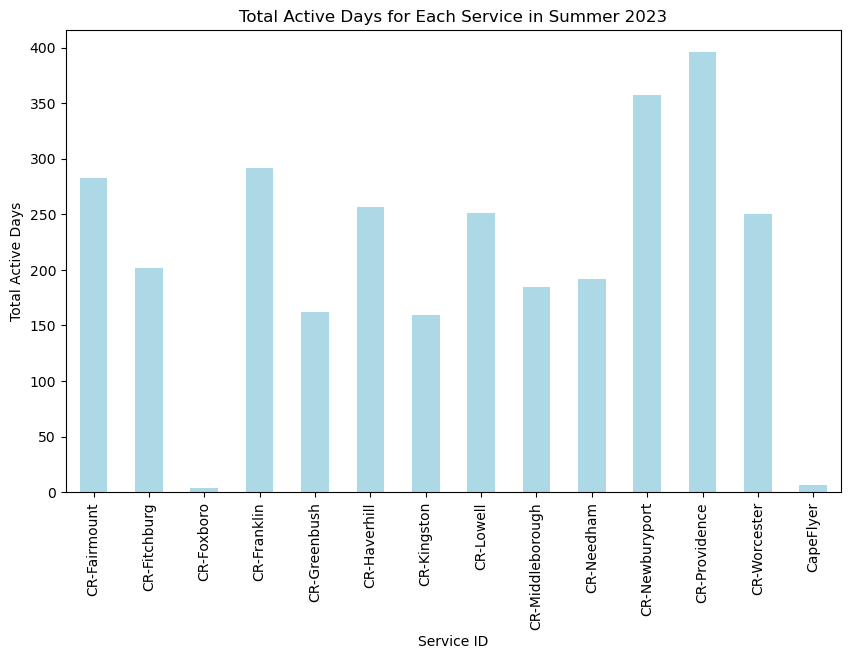

In [18]:
final_merge['total_active_days'] = final_merge[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum(axis=1)

active_days = final_merge.groupby('route_id')['total_active_days'].sum()

plt.figure(figsize=(10, 6))
active_days.plot(kind='bar', color='lightblue')
plt.title(f'Total Active Days for Each Service in Summer 2023')
plt.xlabel('Service ID')
plt.ylabel('Total Active Days')
plt.show()

### Weekday vs Weekend activity during Summer 2023

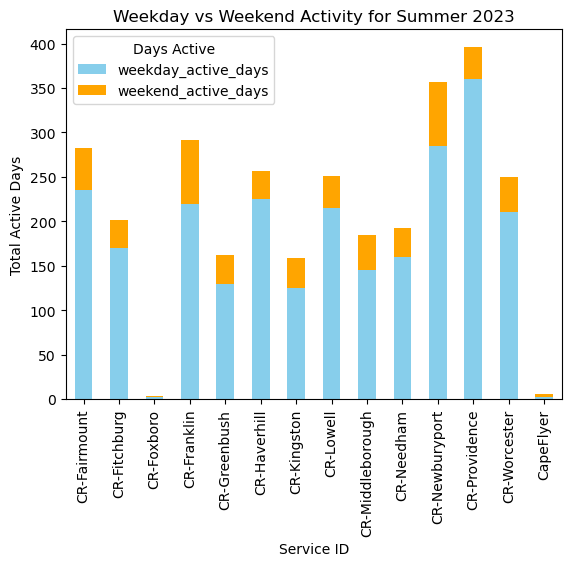

In [19]:
final_merge['weekday_active_days'] = final_merge[['monday', 'tuesday', 'wednesday', 'thursday', 'friday']].sum(axis=1)
final_merge['weekend_active_days'] = final_merge[['saturday', 'sunday']].sum(axis=1)

weekday_vs_weekend = final_merge.groupby('route_id')[['weekday_active_days', 'weekend_active_days']].sum()

weekday_vs_weekend.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title(f'Weekday vs Weekend Activity for Summer 2023')
plt.xlabel('Service ID')
plt.ylabel('Total Active Days')
plt.legend(title='Days Active')
plt.show()

### Frequency Analysis for Summer 2023

In [20]:
avg_active_days_summer = final_merge['total_active_days'].mean()

print(f'Average number of active days per service per week in Summer 2023: {avg_active_days_summer:.2f}')

Average number of active days per service per week in Summer 2023: 2.66


### Peak Usage Days for Summer 2023

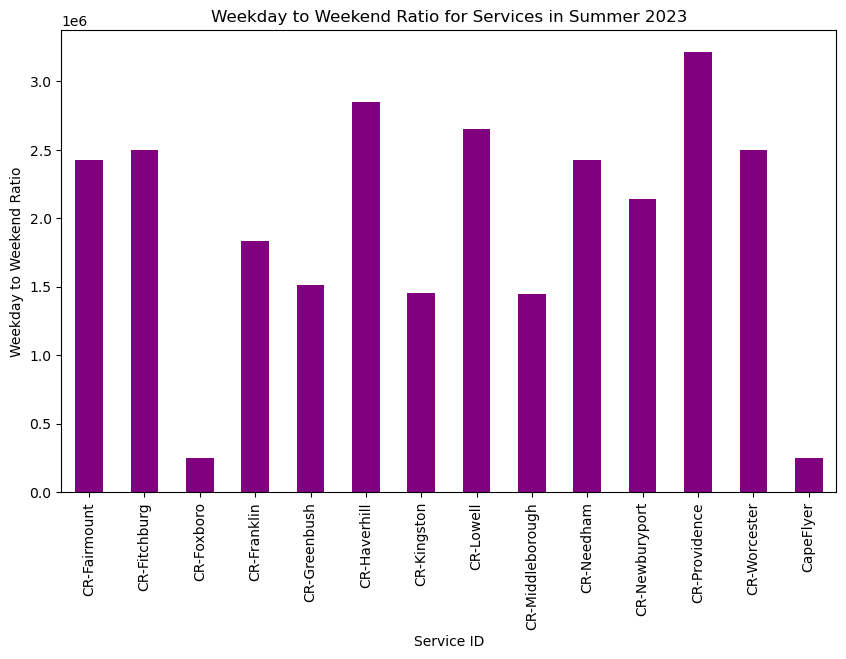

In [22]:
final_merge['weekday_to_weekend_ratio'] = final_merge['weekday_active_days'] / (final_merge['weekend_active_days'] + 1e-6)

weekday_weekend_ratio = final_merge.groupby('route_id')['weekday_to_weekend_ratio'].mean()

plt.figure(figsize=(10, 6))
weekday_weekend_ratio.plot(kind='bar', color='purple')
plt.title(f'Weekday to Weekend Ratio for Services in Summer 2023')
plt.xlabel('Service ID')
plt.ylabel('Weekday to Weekend Ratio')
plt.show()

### How long are services active for during Summer 2023

In [23]:
final_merge['start_date'] = pd.to_datetime(final_merge['start_date'])
final_merge['end_date'] = pd.to_datetime(final_merge['end_date'])

final_merge['active_period_days'] = (final_merge['end_date'] - final_merge['start_date']).dt.days

active_period_stats_summer = final_merge.groupby('route_id')[['route_id', 'active_period_days', 'route_desc']]
print(active_period_stats_summer.head())

           route_id  active_period_days     route_desc
31766  CR-Fairmount                  16  Commuter Rail
31767  CR-Fairmount                  16  Commuter Rail
31768  CR-Fairmount                  14  Commuter Rail
31769  CR-Fairmount                  14  Commuter Rail
31770  CR-Fairmount                  14  Commuter Rail
...             ...                 ...            ...
32886     CapeFlyer                  16  Commuter Rail
32887     CapeFlyer                  16  Commuter Rail
32888     CapeFlyer                  14  Commuter Rail
32889     CapeFlyer                  14  Commuter Rail
32890     CapeFlyer                   7  Commuter Rail

[70 rows x 3 columns]


## Fall 2023 schedule data

In [24]:
calender = pd.read_csv('./datasets/fall_2023/calendar.txt')
trips = pd.read_csv('./datasets/fall_2023/trips.txt')
routes = pd.read_csv('./datasets/fall_2023/routes.txt')

In [25]:
calender['start_date'] = pd.to_datetime(calender['start_date'], format='%Y%m%d')
calender['end_date'] = pd.to_datetime(calender['end_date'], format='%Y%m%d')

In [26]:
trips_cal_merge = pd.merge(trips, calender, on='service_id')
trips_cal_merge = trips_cal_merge[['trip_id', 'route_id', 'service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'start_date', 'end_date']]
final_merge = pd.merge(trips_cal_merge, routes, on='route_id')
final_merge = final_merge[['trip_id', 'route_id', 'route_desc', 'route_type', 'service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'start_date', 'end_date']]
final_merge = final_merge[final_merge['route_desc']=='Commuter Rail']

### Total number of active days of MBTA during Fall 2023

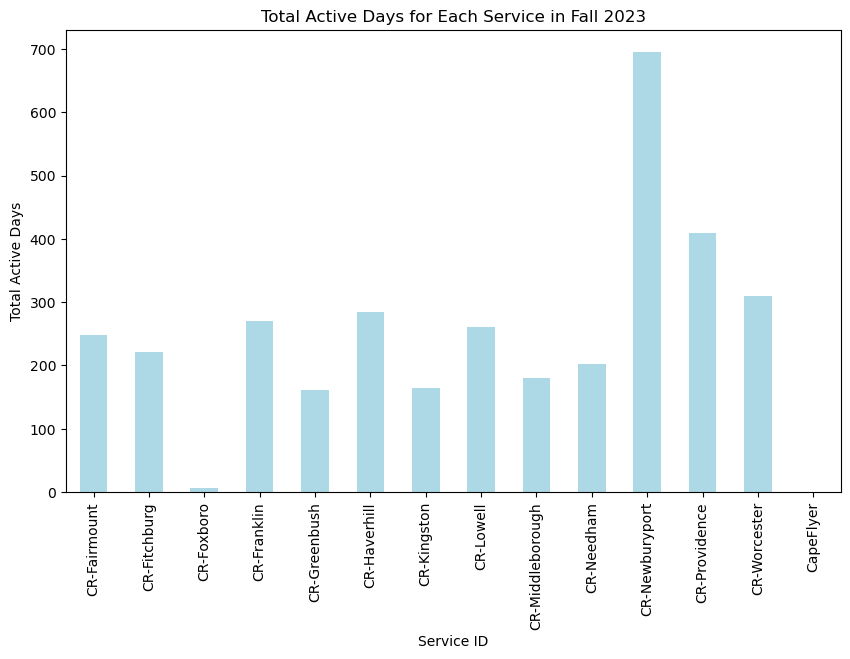

In [27]:
final_merge['total_active_days'] = final_merge[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum(axis=1)

active_days = final_merge.groupby('route_id')['total_active_days'].sum()

plt.figure(figsize=(10, 6))
active_days.plot(kind='bar', color='lightblue')
plt.title(f'Total Active Days for Each Service in Fall 2023')
plt.xlabel('Service ID')
plt.ylabel('Total Active Days')
plt.show()

### Weekday vs Weekend activity during Fall 2023

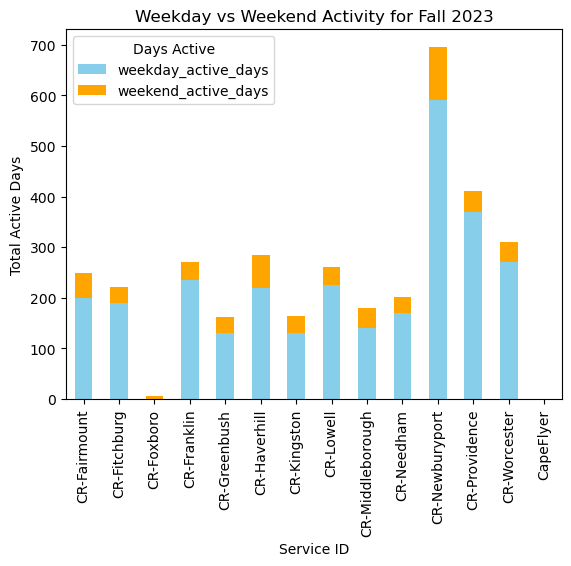

In [28]:
final_merge['weekday_active_days'] = final_merge[['monday', 'tuesday', 'wednesday', 'thursday', 'friday']].sum(axis=1)
final_merge['weekend_active_days'] = final_merge[['saturday', 'sunday']].sum(axis=1)

weekday_vs_weekend = final_merge.groupby('route_id')[['weekday_active_days', 'weekend_active_days']].sum()

weekday_vs_weekend.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title(f'Weekday vs Weekend Activity for Fall 2023')
plt.xlabel('Service ID')
plt.ylabel('Total Active Days')
plt.legend(title='Days Active')
plt.show()

### Frequency Analysis for Fall 2023

In [29]:
avg_active_days_fall = final_merge['total_active_days'].mean()

print(f'Average number of active days per service per week in Fall 2023: {avg_active_days_fall:.2f}')

Average number of active days per service per week in Fall 2023: 2.96


### Peak Usage Days for Fall 2023

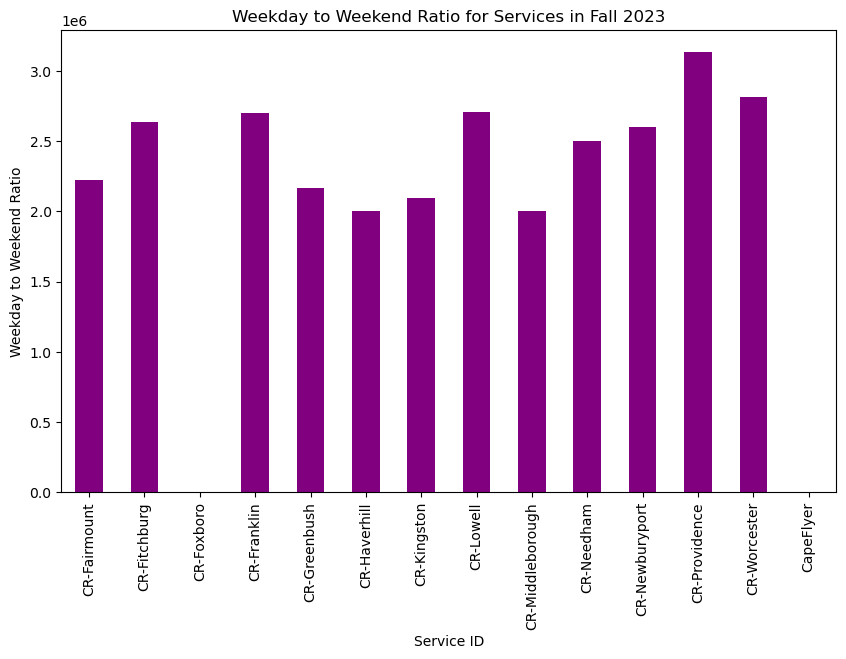

In [30]:
final_merge['weekday_to_weekend_ratio'] = final_merge['weekday_active_days'] / (final_merge['weekend_active_days'] + 1e-6)

weekday_weekend_ratio = final_merge.groupby('route_id')['weekday_to_weekend_ratio'].mean()

plt.figure(figsize=(10, 6))
weekday_weekend_ratio.plot(kind='bar', color='purple')
plt.title(f'Weekday to Weekend Ratio for Services in Fall 2023')
plt.xlabel('Service ID')
plt.ylabel('Weekday to Weekend Ratio')
plt.show()

### How long are services active for during Fall 2023

In [31]:
final_merge['start_date'] = pd.to_datetime(final_merge['start_date'])
final_merge['end_date'] = pd.to_datetime(final_merge['end_date'])

final_merge['active_period_days'] = (final_merge['end_date'] - final_merge['start_date']).dt.days

active_period_stats_fall = final_merge.groupby('route_id')[['route_id', 'active_period_days', 'route_desc']]
print(active_period_stats_fall.head())

           route_id  active_period_days     route_desc
27718  CR-Fairmount                  16  Commuter Rail
27719  CR-Fairmount                  16  Commuter Rail
27720  CR-Fairmount                  14  Commuter Rail
27721  CR-Fairmount                  14  Commuter Rail
27722  CR-Fairmount                  14  Commuter Rail
...             ...                 ...            ...
28778  CR-Worcester                  14  Commuter Rail
28779  CR-Worcester                  14  Commuter Rail
28780  CR-Worcester                  14  Commuter Rail
28872     CapeFlyer                  16  Commuter Rail
28873     CapeFlyer                  16  Commuter Rail

[67 rows x 3 columns]


## Winter 2023 schedule data

In [32]:
calender = pd.read_csv('./datasets/winter_2023/calendar.txt')
trips = pd.read_csv('./datasets/winter_2023/trips.txt')
routes = pd.read_csv('./datasets/winter_2023/routes.txt')

In [33]:
calender['start_date'] = pd.to_datetime(calender['start_date'], format='%Y%m%d')
calender['end_date'] = pd.to_datetime(calender['end_date'], format='%Y%m%d')

In [34]:
trips_cal_merge = pd.merge(trips, calender, on='service_id')
trips_cal_merge = trips_cal_merge[['trip_id', 'route_id', 'service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'start_date', 'end_date']]
final_merge = pd.merge(trips_cal_merge, routes, on='route_id')
final_merge = final_merge[['trip_id', 'route_id', 'route_desc', 'route_type', 'service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'start_date', 'end_date']]
final_merge = final_merge[final_merge['route_desc']=='Commuter Rail']

### Total number of active days of MBTA during Winter 2023

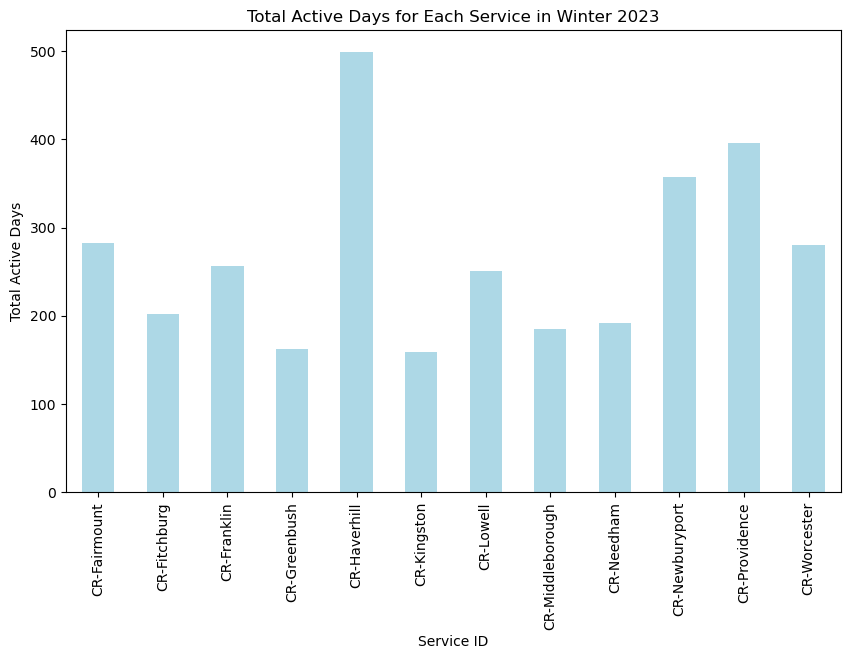

In [35]:
final_merge['total_active_days'] = final_merge[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum(axis=1)

active_days = final_merge.groupby('route_id')['total_active_days'].sum()

plt.figure(figsize=(10, 6))
active_days.plot(kind='bar', color='lightblue')
plt.title(f'Total Active Days for Each Service in Winter 2023')
plt.xlabel('Service ID')
plt.ylabel('Total Active Days')
plt.show()

### Weekday vs Weekend activity during Winter 2023

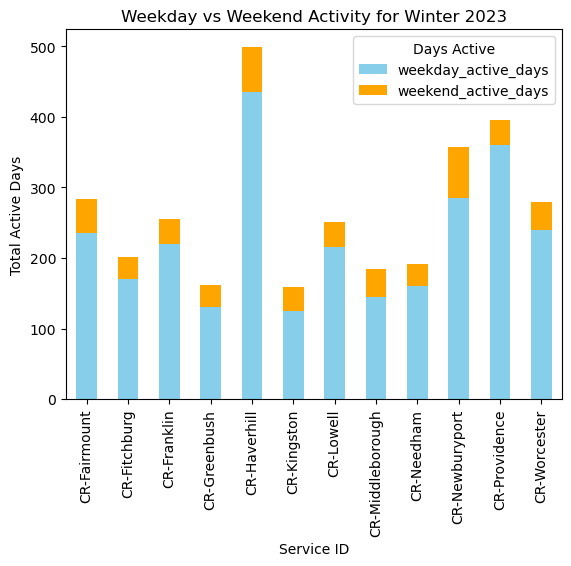

In [36]:
final_merge['weekday_active_days'] = final_merge[['monday', 'tuesday', 'wednesday', 'thursday', 'friday']].sum(axis=1)
final_merge['weekend_active_days'] = final_merge[['saturday', 'sunday']].sum(axis=1)

weekday_vs_weekend = final_merge.groupby('route_id')[['weekday_active_days', 'weekend_active_days']].sum()

weekday_vs_weekend.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title(f'Weekday vs Weekend Activity for Winter 2023')
plt.xlabel('Service ID')
plt.ylabel('Total Active Days')
plt.legend(title='Days Active')
plt.show()

### Frequency Analysis for Winter 2023

In [37]:
avg_active_days_winter = final_merge['total_active_days'].mean()

print(f'Average number of active days per service per week in Winter 2023: {avg_active_days_winter:.2f}')

Average number of active days per service per week in Winter 2023: 3.07


### Peak Usage Days for Winter 2023

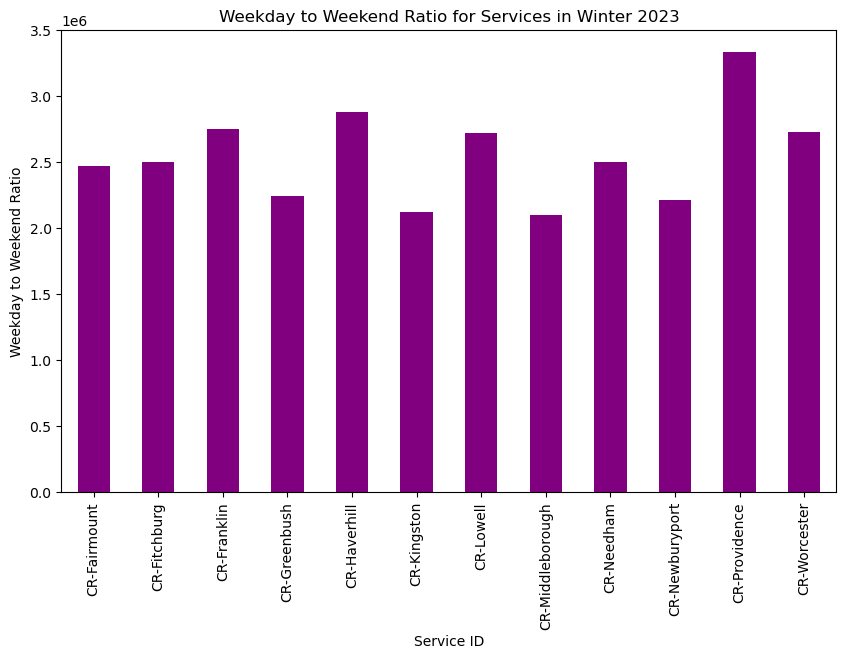

In [38]:
final_merge['weekday_to_weekend_ratio'] = final_merge['weekday_active_days'] / (final_merge['weekend_active_days'] + 1e-6)

weekday_weekend_ratio = final_merge.groupby('route_id')['weekday_to_weekend_ratio'].mean()

plt.figure(figsize=(10, 6))
weekday_weekend_ratio.plot(kind='bar', color='purple')
plt.title(f'Weekday to Weekend Ratio for Services in Winter 2023')
plt.xlabel('Service ID')
plt.ylabel('Weekday to Weekend Ratio')
plt.show()

### How long are services active for during Fall 2023

In [39]:
final_merge['start_date'] = pd.to_datetime(final_merge['start_date'])
final_merge['end_date'] = pd.to_datetime(final_merge['end_date'])

final_merge['active_period_days'] = (final_merge['end_date'] - final_merge['start_date']).dt.days

active_period_stats_winter = final_merge.groupby('route_id')[['route_id', 'active_period_days', 'route_desc']]
print(active_period_stats_winter.head())

               route_id  active_period_days     route_desc
45231      CR-Fairmount                  14  Commuter Rail
45232      CR-Fairmount                  14  Commuter Rail
45233      CR-Fairmount                  14  Commuter Rail
45234      CR-Fairmount                  14  Commuter Rail
45235      CR-Fairmount                  14  Commuter Rail
45326      CR-Fitchburg                  14  Commuter Rail
45327      CR-Fitchburg                  14  Commuter Rail
45328      CR-Fitchburg                  14  Commuter Rail
45329      CR-Fitchburg                  14  Commuter Rail
45330      CR-Fitchburg                  14  Commuter Rail
45394       CR-Franklin                  14  Commuter Rail
45395       CR-Franklin                  14  Commuter Rail
45396       CR-Franklin                  14  Commuter Rail
45397       CR-Franklin                  14  Commuter Rail
45398       CR-Franklin                  14  Commuter Rail
45474      CR-Greenbush                  14  Commuter Ra

## Comparative Plots

### Comparing the average activity of the services per week throughout the year

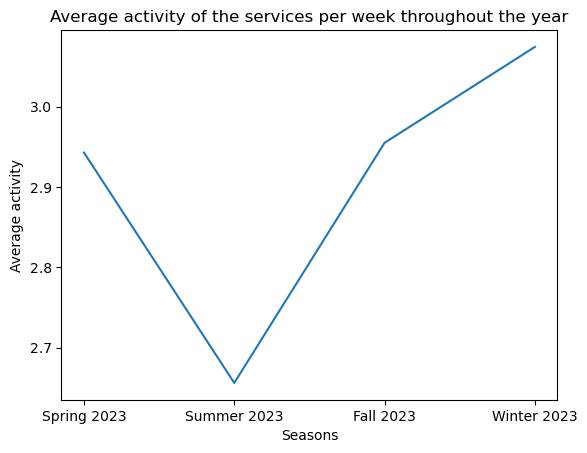

In [40]:
cats = ['Spring 2023', 'Summer 2023', 'Fall 2023', 'Winter 2023']
vals = [avg_active_days_spring, avg_active_days_summer, avg_active_days_fall, avg_active_days_winter]

plt.plot(cats, vals)

plt.xlabel('Seasons')
plt.ylabel('Average activity')
plt.title('Average activity of the services per week throughout the year')

plt.show() 